In [1]:
# IMDB & CNN
# *Dataset에 대해 추가 조사 필요
# - 실제 데이터에 대한 상세 기술
# - 예측하고자 하는 방법/방향 기술 : batch size를 64, hidden dimension을 250으로 CNN을 통해 테스트해서 accuracy를 높이고자 했다.
# - 학습을 위해 데이터가 어떻게 가공/처리되었는지 기술
# - 사용된 모델의 특징에 대한 기술
# - 생성된 모델의 model.summary() 출력
# - epoch은 최소 25회 이상 진행

In [2]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Activation
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing import sequence

Using TensorFlow backend.


In [3]:
MAX_features = 5000
MAX_len = 400
Batch_size = 64
Embedding_dimension = 120
Filters = 250
Kernel_size = 3
Hidden_dimension = 250
Epoch = 25

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_features)

In [5]:
x_train = sequence.pad_sequences(x_train, maxlen=MAX_len)
x_test = sequence.pad_sequences(x_test, maxlen=MAX_len)
print(x_train[0])
print(y_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4 

In [6]:
model = Sequential()
model.add(Embedding(MAX_features,
                    Embedding_dimension,
                    input_length=MAX_len))
model.add(Dropout(0.2))

W0805 16:19:03.591232  6148 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 16:19:03.621149  6148 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 16:19:03.628140  6148 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 16:19:03.643092  6148 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:136: The name tf.placeholder_with_default is d

In [7]:
# Conv1D는 간단한 데이터 학습 예측에 적합한 컨볼루션 레이어이다.
# 특정 부분만 추출 가능(전체 불가능)
model.add(Conv1D(Filters,
                 Kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))

In [8]:
# 가장 큰 벡터값만 추출해주는 풀링 함수이다.
model.add(GlobalMaxPooling1D())

In [9]:
# 히든 레이어는 입력층과 결과층 사이에 존재하는 학습에 중대한 영향을 끼치는 계층이다.
model.add(Dense(Hidden_dimension))

# Dropout -> 네트워크의 일부를 생략 -> 생략한 네트워크는 학습에 영향을 안끼침
# 특정 뉴런의 bias나 weight가 큰 값을 가지면
# 이 뉴련의 영향이 커지게 되면서 다른 뉴런들의 학습 속도가 느려지거나 악영향을 끼칠 수 있다.
# 이런 특정 뉴런의 영향을 받지 않기 떄문에 co-adaptation이 되는 것을 방지 할 수 있다.
model.add(Dropout(0.2))

# sigmoid 함수는 backpropagation 수행할 때 각 계층들을 지나면서 gradient를 계속 곱하게
# 되어서 gradient는 0으로 수렴한다. 그래서 계층이 많아지면 동작하지 않을 수 있다.
# relu 함수는 input value가 0보다 작으면 0 / 0보다 크면 입력값을 보존한다.
model.add(Activation('relu'))

In [10]:
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0805 16:19:03.768804  6148 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 16:19:03.789736  6148 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:3645: The name tf.log is deprecated. Please use tf.math.log instead.

W0805 16:19:03.795686  6148 deprecation.py:323] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
history = model.fit(x_train, y_train,
          batch_size=Batch_size,
          epochs=Epoch,
          validation_data=(x_test, y_test))
history_dict = history.history
history_dict.keys()

Train on 25000 samples, validate on 25000 samples
Epoch 1/25
25000/25000 [==============================] - 82s 3ms/step - loss: 0.4149 - acc: 0.7943 - val_loss: 0.2833 - val_acc: 0.8822
Epoch 2/25
25000/25000 [==============================] - 93s 4ms/step - loss: 0.2083 - acc: 0.9186 - val_loss: 0.2616 - val_acc: 0.8932
Epoch 3/25
25000/25000 [==============================] - 95s 4ms/step - loss: 0.1220 - acc: 0.9557 - val_loss: 0.3018 - val_acc: 0.8872
Epoch 4/25
25000/25000 [==============================] - 95s 4ms/step - loss: 0.0656 - acc: 0.9781 - val_loss: 0.3403 - val_acc: 0.8899
Epoch 5/25
25000/25000 [==============================] - 97s 4ms/step - loss: 0.0299 - acc: 0.9912 - val_loss: 0.4058 - val_acc: 0.8918
Epoch 6/25
25000/25000 [==============================] - 87s 3ms/step - loss: 0.0163 - acc: 0.9951 - val_loss: 0.4619 - val_acc: 0.8898
Epoch 7/25
25000/25000 [==============================] - 93s 4ms/step - loss: 0.0171 - acc: 0.9942 - val_loss: 0.4987 - val_acc

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 120)          600000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400, 120)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          90250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)              

In [14]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy : %.2f%%" % (scores[1]*100))

Accuracy : 88.72%


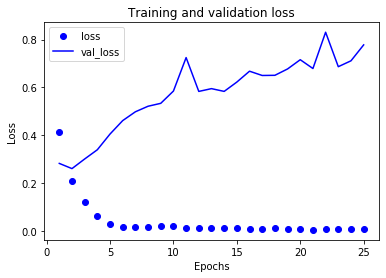

In [16]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()